In [1]:
import pandas as pd 
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt 


In [12]:
data_file = "time_series_covid_19_recovered.csv"
recover_df = pd.read_csv(data_file)
recover_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,0,0,0,0,0,0,...,105,127,157,193,221,255,280,361,413,474
1,Beijing,Mainland China,40.18238,116.4142,0,0,1,2,2,2,...,48,56,69,80,98,108,114,122,145,153
2,Chongqing,Mainland China,30.05718,107.8740,0,0,0,0,0,0,...,79,102,128,152,184,207,225,254,274,299
3,Fujian,Mainland China,26.07783,117.9895,0,0,0,0,0,0,...,45,53,57,63,71,82,90,93,112,126
4,Gansu,Mainland China,36.06110,103.8343,0,0,0,0,0,0,...,24,31,39,39,49,54,58,62,65,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Diamond Princess cruise ship,Others,35.44370,139.6380,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
72,"San Diego County, CA",US,32.71570,-117.1611,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,"San Antonio, TX",US,29.42410,-98.4936,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74,NaN,Egypt,26.82060,30.8025,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
china_df = recover_df.loc[(recover_df["Country/Region"] == "Mainland China"), :]

In [4]:
china_df["January"] = china_df["1/31/20"]

C:\Users\amach\AppData\Local\Continuum\anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
china_df["February"] = china_df["2/20/20"]

C:\Users\amach\AppData\Local\Continuum\anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
china_df["Test"] = china_df["February"] - china_df["January"]

C:\Users\amach\AppData\Local\Continuum\anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
china_df = china_df.rename(columns = {"February":"Total","Test":"February"})

C:\Users\amach\AppData\Local\Continuum\anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


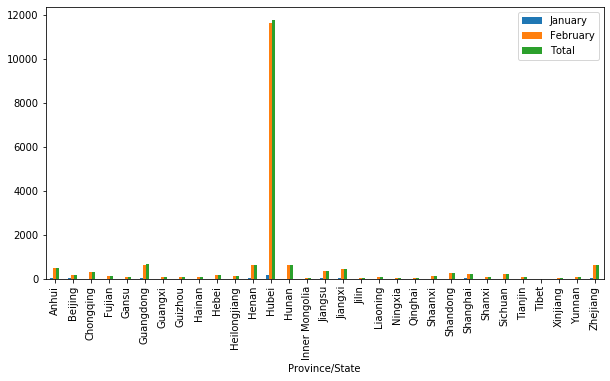

In [8]:
grouped_city = china_df.groupby(["Province/State"])["January","February","Total"].sum()
grouped_city
multi_plot = grouped_city.plot(kind="bar", figsize=(10,5)) 


In [9]:
without_hubei = china_df.loc[china_df["Province/State"] != "Hubei"]


C:\Users\amach\AppData\Local\Continuum\anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


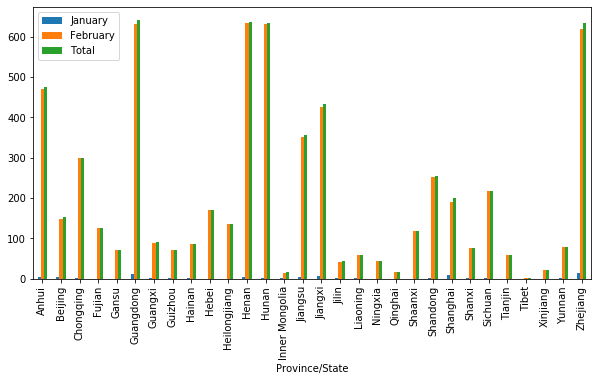

In [10]:
grouped_hubei = without_hubei.groupby(["Province/State"])["January","February","Total"].sum()
grouped_hubei
multi_plot = grouped_hubei.plot(kind="bar", figsize=(10,5)) 


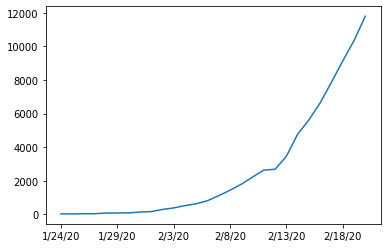

In [15]:
just_hubei = recover_df.loc[(recover_df["Province/State"] == "Hubei") & (recover_df["Country/Region"] == "Mainland China") ]
groupedjust_hubei = just_hubei.groupby(["Province/State"]).sum().iloc[0,4:]
groupedjust_hubei.plot()


In [16]:
grouped_hubei

,January,February,Total
Province/State,,,
Anhui,3,471,474
Beijing,5,148,153
Chongqing,1,298,299
Fujian,0,126,126
Gansu,0,71,71
Guangdong,11,631,642
Guangxi,2,88,90
Guizhou,2,70,72
Hainan,1,85,86


In [17]:
import yfinance as yf  
 
# Get the data of the stock AAPL
data = yf.download('AAPL','2016-01-01','2018-01-01')
 
# Plot the close price of the AAPL
data.Close.plot()
plt.show()

ModuleNotFoundError: No module named 'yfinance'